In [10]:
# Test HQ PI Tom Pearce - epochs good results - made in collab

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.seasonal import seasonal_decompose

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
import keras
from keras import backend as K
import tensorflow as tf
from keras.callbacks import EarlyStopping


In [11]:
# Load CSV data
# missing values will be forward filled
product1 = pd.read_csv('/Users/felixkurth/Documents/Inf_Master/PythonProgramme/Masterarbeit/Testdaten/1.csv',parse_dates=['datum']).fillna(method='ffill')
product2 = pd.read_csv('/Users/felixkurth/Documents/Inf_Master/PythonProgramme/Masterarbeit/Testdaten/2.csv',parse_dates=['datum']).fillna(method='ffill')
product3 = pd.read_csv('/Users/felixkurth/Documents/Inf_Master/PythonProgramme/Masterarbeit/Testdaten/3.csv',parse_dates=['datum']).fillna(method='ffill')
product4 = pd.read_csv('/Users/felixkurth/Documents/Inf_Master/PythonProgramme/Masterarbeit/Testdaten/4.csv',parse_dates=['datum']).fillna(method='ffill')

In [12]:

def preprocess_for_stationarity(product, seasonality=0):
    
    # Log transform
    product['log_demand'] = np.log(product['bedarf_stueck'])

    # First order differencing
    product['first_order_diff'] = product['log_demand']-product['log_demand'].shift(1)
    product['first_order_diff'] = product['first_order_diff'].dropna()
    
    # Seasonal differencing
    if seasonality>0:
        product['seasonal_diff'] = product['first_order_diff']-product['first_order_diff'].shift(seasonality)
        product['seasonal_diff'] = product['seasonal_diff'].dropna()

    return product.dropna()

# for product 1 special case because existence of zeroes
product1_processed=product1
constant_to_add = abs(product1_processed['bedarf_stueck'].min()) + 1
product1_processed['log_demand'] = np.log(product1_processed['bedarf_stueck'] + constant_to_add)
product1_processed['first_order_diff'] = product1_processed["log_demand"] - product1_processed['log_demand'].shift(1)
product1_processed['first_order_diff'] = product1_processed['first_order_diff'].dropna()
product1_processed['seasonal_diff'] = product1_processed["first_order_diff"] - product1_processed['first_order_diff'].shift(52)#product1_processed['log_demand'].diff(52).dropna()
product1_processed['seasonal_diff'] = product1_processed['seasonal_diff'].dropna()
product1_processed = product1_processed.dropna()

product2_processed = preprocess_for_stationarity(product2,52)
product3_processed = preprocess_for_stationarity(product3,52)
product4_processed = preprocess_for_stationarity(product4,52)


One step forecasting

In [14]:
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=50,test_size=1,max_train_size=100)

Epoch 29: early stopping
Epoch 30: early stopping
Epoch 17: early stopping
Epoch 34: early stopping
Epoch 18: early stopping
Epoch 24: early stopping
Epoch 25: early stopping
Epoch 46: early stopping
Epoch 19: early stopping
Epoch 33: early stopping
Epoch 27: early stopping
Epoch 18: early stopping
Epoch 17: early stopping
Epoch 32: early stopping
Epoch 27: early stopping
Epoch 23: early stopping
Epoch 32: early stopping
Epoch 40: early stopping
Epoch 39: early stopping
Epoch 23: early stopping
Epoch 32: early stopping
Epoch 44: early stopping
Epoch 32: early stopping
Epoch 41: early stopping
Epoch 17: early stopping
Epoch 30: early stopping
Epoch 24: early stopping
Epoch 28: early stopping
Epoch 16: early stopping
Epoch 44: early stopping
Epoch 30: early stopping
Epoch 16: early stopping
Epoch 17: early stopping
Epoch 43: early stopping
Epoch 25: early stopping
Epoch 30: early stopping
Epoch 19: early stopping
Epoch 33: early stopping
Epoch 46: early stopping
Epoch 16: early stopping


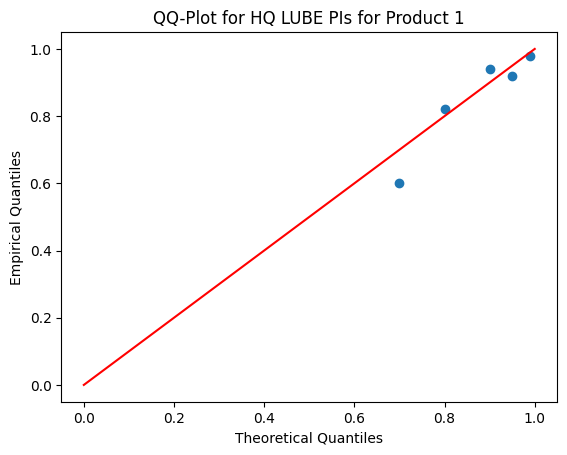

Epoch 34: early stopping
Epoch 31: early stopping
Epoch 18: early stopping
Epoch 19: early stopping
Epoch 19: early stopping
Epoch 39: early stopping
Epoch 42: early stopping
Epoch 16: early stopping
Epoch 44: early stopping
Epoch 39: early stopping
Epoch 17: early stopping
Epoch 27: early stopping
Epoch 24: early stopping
Epoch 32: early stopping
Epoch 16: early stopping
Epoch 40: early stopping
Epoch 16: early stopping
Epoch 22: early stopping
Epoch 36: early stopping
Epoch 25: early stopping
Epoch 16: early stopping
Epoch 17: early stopping
Epoch 38: early stopping
Epoch 26: early stopping
Epoch 23: early stopping
Epoch 17: early stopping
Epoch 22: early stopping
Epoch 43: early stopping
Epoch 44: early stopping
Epoch 19: early stopping
Epoch 19: early stopping
Epoch 28: early stopping
Epoch 16: early stopping
Epoch 16: early stopping
Epoch 41: early stopping
Epoch 34: early stopping
Epoch 19: early stopping
Epoch 26: early stopping
Epoch 39: early stopping
Epoch 21: early stopping


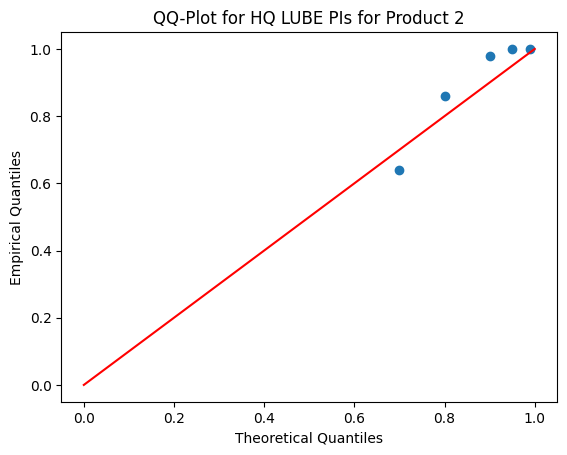

Epoch 33: early stopping
Epoch 35: early stopping
Epoch 20: early stopping
Epoch 27: early stopping
Epoch 48: early stopping
Epoch 35: early stopping
Epoch 40: early stopping
Epoch 47: early stopping
Epoch 30: early stopping
Epoch 20: early stopping
Epoch 45: early stopping
Epoch 34: early stopping
Epoch 41: early stopping
Epoch 26: early stopping
Epoch 17: early stopping
Epoch 31: early stopping
Epoch 26: early stopping
Epoch 16: early stopping
Epoch 37: early stopping
Epoch 32: early stopping
Epoch 30: early stopping
Epoch 19: early stopping
Epoch 33: early stopping
Epoch 32: early stopping
Epoch 45: early stopping
Epoch 26: early stopping
Epoch 30: early stopping
Epoch 37: early stopping
Epoch 17: early stopping
Epoch 34: early stopping
Epoch 38: early stopping
Epoch 28: early stopping
Epoch 28: early stopping
Epoch 17: early stopping
Epoch 46: early stopping
Epoch 31: early stopping
Epoch 20: early stopping
Epoch 45: early stopping
Epoch 16: early stopping
Epoch 21: early stopping


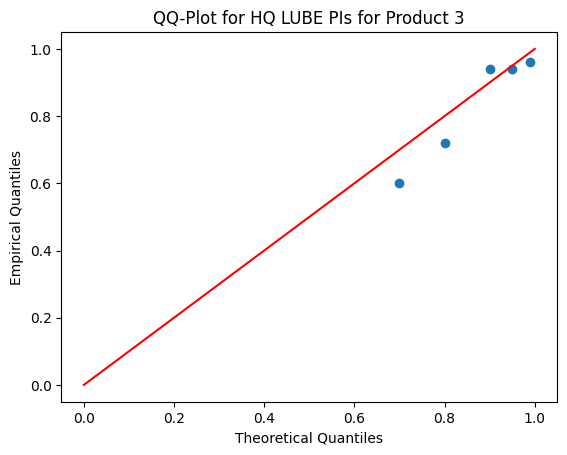

Epoch 26: early stopping
Epoch 26: early stopping
Epoch 25: early stopping
Epoch 16: early stopping
Epoch 36: early stopping
Epoch 18: early stopping
Epoch 17: early stopping
Epoch 18: early stopping
Epoch 32: early stopping
Epoch 27: early stopping
Epoch 17: early stopping
Epoch 31: early stopping
Epoch 31: early stopping
Epoch 39: early stopping
Epoch 33: early stopping
Epoch 36: early stopping
Epoch 19: early stopping
Epoch 44: early stopping
Epoch 40: early stopping
Epoch 43: early stopping
Epoch 33: early stopping
Epoch 26: early stopping
Epoch 50: early stopping
Epoch 37: early stopping
Epoch 36: early stopping
Epoch 24: early stopping
Epoch 18: early stopping
Epoch 28: early stopping
Epoch 31: early stopping
Epoch 33: early stopping
Epoch 17: early stopping
Epoch 42: early stopping
Epoch 16: early stopping
Epoch 19: early stopping
Epoch 47: early stopping
Epoch 19: early stopping
Epoch 45: early stopping
Epoch 17: early stopping
Epoch 42: early stopping
Epoch 49: early stopping


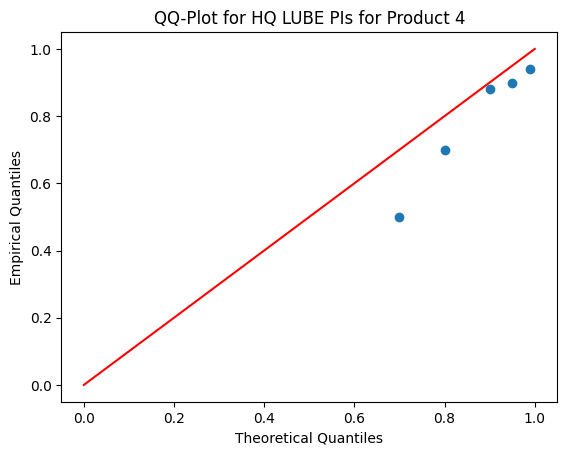

In [18]:
def get_nn_model(alpha_):
    '''
    Create and compile the neural network model based on the specified alpha_
    '''

    lambda_ = 0.01 # lambda in loss fn
    #alpha_ = 0.05  # capturing (1-alpha)% of samples
    soften_ = 160.
    n_ = 100 # batch size

    model = Sequential()
    model.add(Dense(100, input_dim=1, activation='relu',
                    kernel_initializer=keras.initializers.RandomNormal(mean=0.0, stddev=0.2)))
    model.add(Dense(2, activation='linear',
                    kernel_initializer=keras.initializers.RandomNormal(mean=0.0, stddev=0.3),
                    bias_initializer=keras.initializers.Constant(value=[1.,-1.]))) # important to init biases to start!

    def qd_objective(y_true, y_pred):
        '''Loss_QD-soft, from algorithm 1'''
        y_true = y_true[:,0]
        y_u = y_pred[:,0]
        y_l = y_pred[:,1]

        K_HU = tf.maximum(0.,tf.sign(y_u - y_true))
        K_HL = tf.maximum(0.,tf.sign(y_true - y_l))
        K_H = tf.multiply(K_HU, K_HL)

        K_SU = tf.sigmoid(tf.clip_by_value(soften_ * (y_u - y_true), -10, 10))
        K_SL = tf.sigmoid(tf.clip_by_value(soften_ * (y_true - y_l), -10, 10))

        K_S = tf.multiply(K_SU, K_SL)
        epsilon = 1e-7
        MPIW_c = tf.reduce_sum(tf.multiply((y_u - y_l), K_H)) / (tf.reduce_sum(K_H) )

        PICP_H = tf.reduce_mean(K_H)
        PICP_S = tf.reduce_mean(K_S)

        Loss_S = MPIW_c + lambda_ * n_ / (alpha_*(1-alpha_)) * tf.maximum(0.,(1-alpha_) - PICP_S)

        return Loss_S

    early_stopping = EarlyStopping(monitor='loss',
                                patience=25,
                                verbose=1,
                                restore_best_weights=False)

    lr_schedule = keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate=1e-2,
        decay_steps=10000,
        decay_rate=0.9)
    opt = keras.optimizers.legacy.Adam(learning_rate=lr_schedule)
    #opt = keras.optimizers.legacy.Adam(lr=0.02, decay=0.01)
    model.compile(loss=qd_objective, optimizer=opt)

    return model


early_stopping = EarlyStopping(monitor='loss',
                                patience=15,
                                verbose=1,
                                restore_best_weights=False)
def compute_and_plot_NN_QQ(data, tscv, product_name, alpha_levels=[0.01, 0.05, 0.10, 0.20,0.30]):
    empirical_quantiles = {}
    normalization_factor = np.max(data) - np.min(data)
    PICP_dict = {alpha: [] for alpha in alpha_levels}
    MPIW_dict = {alpha: [] for alpha in alpha_levels}
    NMPIW_dict = {alpha: [] for alpha in alpha_levels}

    for train_index, test_index in tscv.split(data):
        X_train, X_test = train_index.reshape(-1, 1), test_index.reshape(-1, 1)
        y_train, y_test = data[train_index], data[test_index]

        X_train_mean, X_train_std = np.mean(X_train), np.std(X_train)
        X_train = (X_train - X_train_mean) / X_train_std
        y_mean, y_std = np.mean(y_train), np.std(y_train)
        y_train = (y_train - y_mean) / y_std


        X_test = (X_test - X_train_mean) / X_train_std
        y_test = (y_test - y_mean) / y_std

        for alpha in alpha_levels:
            model = get_nn_model(alpha)
            model.fit(X_train, y_train, epochs=50, batch_size=100, verbose=0, callbacks=[early_stopping])

            y_pred_test = model.predict(X_test, verbose=0)

            # unnormalize
            y_pred_test[:, 0] = y_pred_test[:, 0] * y_std + y_mean  # upper bound
            y_pred_test[:, 1] = y_pred_test[:, 1] * y_std + y_mean  # lower bound
            y_test = y_test * y_std + y_mean

            y_u_pred_test = y_pred_test[:, 0]
            y_l_pred_test = y_pred_test[:, 1]

            within_interval_count = np.sum(np.logical_and(y_l_pred_test <= y_test, y_u_pred_test >= y_test))
            total_width = np.sum(y_u_pred_test - y_l_pred_test)
            PICP = within_interval_count / len(y_test)
            MPIW = total_width / len(y_test)
           
            PICP_dict[alpha].append(PICP)
            MPIW_dict[alpha].append(MPIW)
            NMPIW_dict[alpha].append(MPIW/normalization_factor)

            if alpha not in empirical_quantiles:
                empirical_quantiles[alpha] = []
            empirical_quantiles[alpha].append(PICP)

    PICP_values = {alpha: np.mean(values) for alpha, values in PICP_dict.items()}
    MPIW_values = {alpha: np.mean(values) for alpha, values in MPIW_dict.items()}
    NMPIW_values = {alpha: np.mean(values) for alpha, values in NMPIW_dict.items()}

    for alpha in alpha_levels:
        print(f"Alpha: {alpha}, PICP: {PICP_values[alpha]*100:.2f}%, MPIW: {MPIW_values[alpha]:.4f},  NMPIW: {NMPIW_values[alpha]:.4f}")
        
    empirical_quantiles = {alpha: np.mean(values) for alpha, values in empirical_quantiles.items()}

    theoretical_quantiles = [1-a for a in alpha_levels]
    empirical_values = [empirical_quantiles[a] for a in alpha_levels]

    plt.plot(theoretical_quantiles, empirical_values, 'o')
    plt.plot([0, 1], [0, 1], 'r-')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Empirical Quantiles')
    plt.title(f'QQ-Plot for HQ LUBE PIs for {product_name}')
    plt.show()

products_data = [
    (product1_processed['seasonal_diff'].values, "Product 1"),
    (product2_processed['seasonal_diff'].values, "Product 2"),
    (product3_processed['seasonal_diff'].values, "Product 3"),
    (product4_processed['seasonal_diff'].values, "Product 4")
]
tscv = TimeSeriesSplit(n_splits=50,test_size=1,max_train_size=100)
for data, product_name in products_data:
    compute_and_plot_NN_QQ(data, tscv, product_name)

Multi step forecasting

In [20]:
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=30,test_size=5,max_train_size=100)

Epoch 32: early stopping
Epoch 28: early stopping
Epoch 35: early stopping
Epoch 35: early stopping
Epoch 18: early stopping
Epoch 31: early stopping
Epoch 29: early stopping
Epoch 45: early stopping
Epoch 20: early stopping
Epoch 14: early stopping
Epoch 28: early stopping
Epoch 44: early stopping
Epoch 29: early stopping
Epoch 48: early stopping
Epoch 12: early stopping
Epoch 28: early stopping
Epoch 28: early stopping
Epoch 23: early stopping
Epoch 16: early stopping
Epoch 17: early stopping
Epoch 36: early stopping
Epoch 19: early stopping
Epoch 13: early stopping
Epoch 33: early stopping
Epoch 19: early stopping
Epoch 40: early stopping
Epoch 44: early stopping
Epoch 14: early stopping
Epoch 31: early stopping
Epoch 18: early stopping
Epoch 29: early stopping
Epoch 20: early stopping
Epoch 12: early stopping
Epoch 18: early stopping
Epoch 31: early stopping
Epoch 22: early stopping
Epoch 11: early stopping
Epoch 13: early stopping
Epoch 13: early stopping
Epoch 39: early stopping


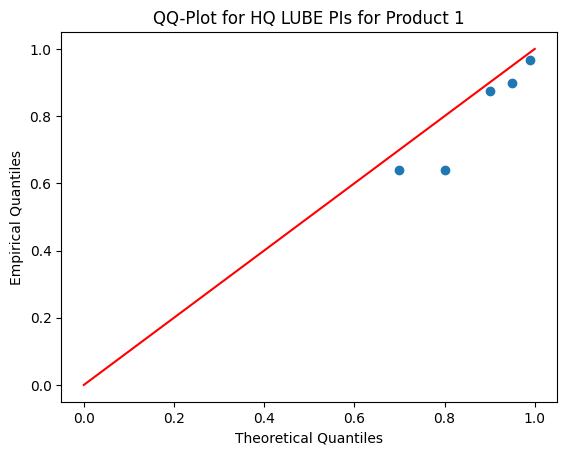

Epoch 27: early stopping
Epoch 33: early stopping
Epoch 42: early stopping
Epoch 25: early stopping
Epoch 27: early stopping
Epoch 12: early stopping
Epoch 25: early stopping
Epoch 12: early stopping
Epoch 27: early stopping
Epoch 25: early stopping
Epoch 30: early stopping
Epoch 12: early stopping
Epoch 12: early stopping
Epoch 48: early stopping
Epoch 40: early stopping
Epoch 18: early stopping
Epoch 11: early stopping
Epoch 13: early stopping
Epoch 11: early stopping
Epoch 32: early stopping
Epoch 23: early stopping
Epoch 22: early stopping
Epoch 11: early stopping
Epoch 32: early stopping
Epoch 23: early stopping
Epoch 26: early stopping
Epoch 11: early stopping
Epoch 12: early stopping
Epoch 28: early stopping
Epoch 40: early stopping
Epoch 32: early stopping
Epoch 11: early stopping
Epoch 20: early stopping
Epoch 35: early stopping
Epoch 18: early stopping
Epoch 49: early stopping
Epoch 27: early stopping
Epoch 11: early stopping
Epoch 24: early stopping
Epoch 14: early stopping


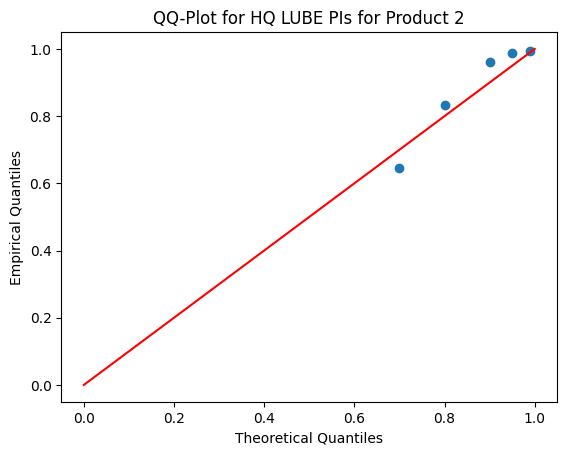

Epoch 30: early stopping
Epoch 29: early stopping
Epoch 11: early stopping
Epoch 12: early stopping
Epoch 12: early stopping
Epoch 25: early stopping
Epoch 43: early stopping
Epoch 24: early stopping
Epoch 17: early stopping
Epoch 12: early stopping
Epoch 40: early stopping
Epoch 25: early stopping
Epoch 35: early stopping
Epoch 11: early stopping
Epoch 29: early stopping
Epoch 33: early stopping
Epoch 28: early stopping
Epoch 34: early stopping
Epoch 15: early stopping
Epoch 12: early stopping
Epoch 25: early stopping
Epoch 24: early stopping
Epoch 11: early stopping
Epoch 45: early stopping
Epoch 33: early stopping
Epoch 20: early stopping
Epoch 18: early stopping
Epoch 11: early stopping
Epoch 11: early stopping
Epoch 35: early stopping
Epoch 26: early stopping
Epoch 21: early stopping
Epoch 31: early stopping
Epoch 11: early stopping
Epoch 31: early stopping
Epoch 25: early stopping
Epoch 14: early stopping
Epoch 15: early stopping
Epoch 19: early stopping
Epoch 29: early stopping


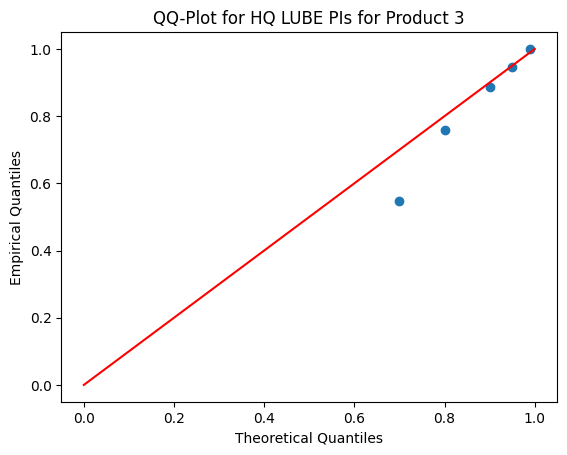

Epoch 22: early stopping
Epoch 17: early stopping
Epoch 25: early stopping
Epoch 11: early stopping
Epoch 18: early stopping
Epoch 28: early stopping
Epoch 30: early stopping
Epoch 22: early stopping
Epoch 35: early stopping
Epoch 11: early stopping
Epoch 11: early stopping
Epoch 16: early stopping
Epoch 45: early stopping
Epoch 20: early stopping
Epoch 26: early stopping
Epoch 17: early stopping
Epoch 22: early stopping
Epoch 33: early stopping
Epoch 48: early stopping
Epoch 17: early stopping
Epoch 13: early stopping
Epoch 27: early stopping
Epoch 44: early stopping
Epoch 11: early stopping
Epoch 38: early stopping
Epoch 16: early stopping
Epoch 20: early stopping
Epoch 44: early stopping
Epoch 11: early stopping
Epoch 11: early stopping
Epoch 19: early stopping
Epoch 29: early stopping
Epoch 26: early stopping
Epoch 15: early stopping
Epoch 14: early stopping
Epoch 28: early stopping
Epoch 28: early stopping
Epoch 43: early stopping
Epoch 21: early stopping
Epoch 30: early stopping


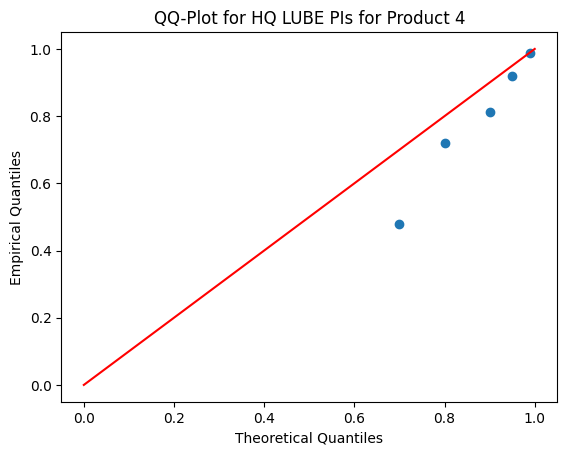

In [21]:
def get_nn_model(alpha_):
    '''
    Create and compile the neural network model based on the specified alpha_
    '''

    lambda_ = 0.01 # lambda in loss fn
    #alpha_ = 0.05  # capturing (1-alpha)% of samples
    soften_ = 160.
    n_ = 100 # batch size

    model = Sequential()
    model.add(Dense(100, input_dim=1, activation='relu',
                    kernel_initializer=keras.initializers.RandomNormal(mean=0.0, stddev=0.2)))
    model.add(Dense(2, activation='linear',
                    kernel_initializer=keras.initializers.RandomNormal(mean=0.0, stddev=0.3),
                    bias_initializer=keras.initializers.Constant(value=[1.,-1.]))) # important to init biases to start!

    def qd_objective(y_true, y_pred):
        '''Loss_QD-soft, from algorithm 1'''
        y_true = y_true[:,0]
        y_u = y_pred[:,0]
        y_l = y_pred[:,1]

        K_HU = tf.maximum(0.,tf.sign(y_u - y_true))
        K_HL = tf.maximum(0.,tf.sign(y_true - y_l))
        K_H = tf.multiply(K_HU, K_HL)

        K_SU = tf.sigmoid(tf.clip_by_value(soften_ * (y_u - y_true), -10, 10))
        K_SL = tf.sigmoid(tf.clip_by_value(soften_ * (y_true - y_l), -10, 10))

        #K_SU = tf.sigmoid(soften_ * (y_u - y_true))
        #K_SL = tf.sigmoid(soften_ * (y_true - y_l))
        K_S = tf.multiply(K_SU, K_SL)
        epsilon = 1e-7
        MPIW_c = tf.reduce_sum(tf.multiply((y_u - y_l), K_H)) / (tf.reduce_sum(K_H) )

        #MPIW_c = tf.reduce_sum(tf.multiply((y_u - y_l),K_H))/tf.reduce_sum(K_H)
        PICP_H = tf.reduce_mean(K_H)
        PICP_S = tf.reduce_mean(K_S)

        Loss_S = MPIW_c + lambda_ * n_ / (alpha_*(1-alpha_)) * tf.maximum(0.,(1-alpha_) - PICP_S)

        return Loss_S

    early_stopping = EarlyStopping(monitor='loss',
                                patience=25,
                                verbose=1,
                                restore_best_weights=False)

    lr_schedule = keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate=1e-2,
        decay_steps=10000,
        decay_rate=0.9)
    opt = keras.optimizers.legacy.Adam(learning_rate=lr_schedule)
    #opt = keras.optimizers.legacy.Adam(lr=0.02, decay=0.01)
    model.compile(loss=qd_objective, optimizer=opt)

    return model


early_stopping = EarlyStopping(monitor='loss',
                                patience=10,
                                verbose=1,
                                restore_best_weights=False)
def compute_and_plot_NN_QQ(data, tscv, product_name, alpha_levels=[0.01, 0.05, 0.10, 0.20, 0.30]):
    empirical_quantiles = {}
    normalization_factor = np.max(data) - np.min(data)
    PICP_dict = {alpha: [] for alpha in alpha_levels}
    MPIW_dict = {alpha: [] for alpha in alpha_levels}
    NMPIW_dict = {alpha: [] for alpha in alpha_levels}

    for train_index, test_index in tscv.split(data):
        X_train, X_test = train_index.reshape(-1, 1), test_index.reshape(-1, 1)
        y_train, y_test = data[train_index], data[test_index]

        # Normalizing X and y
        X_train_mean, X_train_std = np.mean(X_train), np.std(X_train)
        X_train = (X_train - X_train_mean) / X_train_std
        y_mean, y_std = np.mean(y_train), np.std(y_train)
        y_train = (y_train - y_mean) / y_std


        X_test = (X_test - X_train_mean) / X_train_std
        y_test = (y_test - y_mean) / y_std

        for alpha in alpha_levels:
            model = get_nn_model(alpha)
            model.fit(X_train, y_train, epochs=50, batch_size=100, verbose=0, callbacks=[early_stopping])

            y_pred_test = model.predict(X_test, verbose=0)

            # unnormalize
            y_pred_test[:, 0] = y_pred_test[:, 0] * y_std + y_mean  # upper bound
            y_pred_test[:, 1] = y_pred_test[:, 1] * y_std + y_mean  # lower bound
            y_test = y_test * y_std + y_mean

            y_u_pred_test = y_pred_test[:, 0]
            y_l_pred_test = y_pred_test[:, 1]

            within_interval_count = np.sum(np.logical_and(y_l_pred_test <= y_test, y_u_pred_test >= y_test))
            total_width = np.sum(y_u_pred_test - y_l_pred_test)
            PICP = within_interval_count / len(y_test)
            MPIW = total_width / len(y_test)

            PICP_dict[alpha].append(PICP)
            MPIW_dict[alpha].append(MPIW)
            NMPIW_dict[alpha].append(MPIW/normalization_factor)

            if alpha not in empirical_quantiles:
                empirical_quantiles[alpha] = []
            empirical_quantiles[alpha].append(PICP)

    PICP_values = {alpha: np.mean(values) for alpha, values in PICP_dict.items()}
    MPIW_values = {alpha: np.mean(values) for alpha, values in MPIW_dict.items()}
    NMPIW_values = {alpha: np.mean(values) for alpha, values in NMPIW_dict.items()}

    for alpha in alpha_levels:
        print(f"Alpha: {alpha}, PICP: {PICP_values[alpha]*100:.2f}%, MPIW: {MPIW_values[alpha]:.4f},  NMPIW: {NMPIW_values[alpha]:.4f}")
        
    empirical_quantiles = {alpha: np.mean(values) for alpha, values in empirical_quantiles.items()}

    theoretical_quantiles = [1-a for a in alpha_levels]
    empirical_values = [empirical_quantiles[a] for a in alpha_levels]

    plt.plot(theoretical_quantiles, empirical_values, 'o')
    plt.plot([0, 1], [0, 1], 'r-')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Empirical Quantiles')
    plt.title(f'QQ-Plot for HQ LUBE PIs for {product_name}')
    plt.show()

products_data = [
    (product1_processed['seasonal_diff'].values, "Product 1"),
    (product2_processed['seasonal_diff'].values, "Product 2"),
    (product3_processed['seasonal_diff'].values, "Product 3"),
    (product4_processed['seasonal_diff'].values, "Product 4")
]

for data, product_name in products_data:
    compute_and_plot_NN_QQ(data, tscv, product_name)